In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#rename colums
df=df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

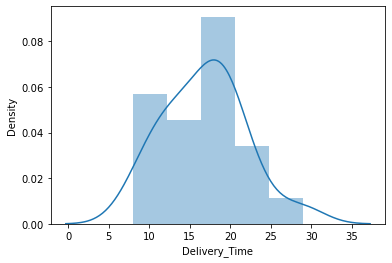

In [4]:
sns.distplot(df['Delivery_Time'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

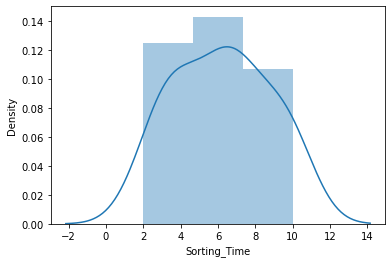

In [5]:
sns.distplot(df['Sorting_Time'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

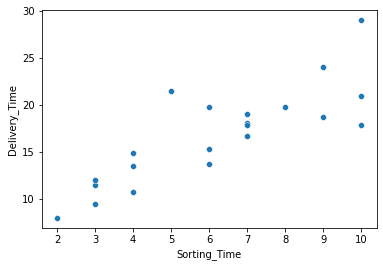

In [6]:
sns.scatterplot(df['Sorting_Time'],df['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

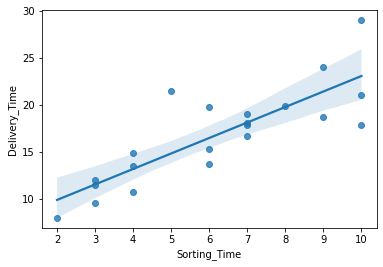

In [7]:
sns.regplot(x=df['Sorting_Time'],y=df['Delivery_Time'])

In [8]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

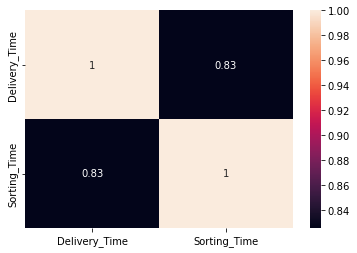

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
#model building

import statsmodels.formula.api as smf

In [11]:
model = smf.ols('Delivery_Time~Sorting_Time',data=df).fit()

In [12]:
# t value and p value
model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [13]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [14]:
#find rsquared value for accuracy
model.rsquared

0.6822714748417231

In [15]:
#try on new data set
newdf=pd.Series([6,8])
newdf

0    6
1    8
dtype: int64

In [16]:

newdf=pd.DataFrame(newdf,columns=['Sorting_Time'])
newdf

,Sorting_Time
0,6
1,8


In [17]:
model.predict(newdf)

0    16.476853
1    19.774893
dtype: float64